# Modelo que predice si un cliente va a comprar un seguro de vida

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


Generamos el dataset con 500 registros

In [ ]:
np.random.seed(42)

n = 500
age = np.random.randint(18, 71, size=n)
income = np.random.randint(20000, 100001, size=n)

Calculamos el score lineal y le aplicamos sigmoide para las probabilidades.

In [ ]:
score = -0.1 * (age - 30) + 0.2 * ((income / 1000) - 40)
prob = 1 / (1 + np.exp(-score))

Generamos la etiqueta binaria

In [ ]:
y = (np.random.rand(n) < prob).astype(int)

Se construye una matriz con 2 columnas y se muestran las filas para verificar los datos

In [ ]:
X = np.column_stack((age, income))

print("Primeras filas de X (Edad, Ingreso):")
print(X[:5, :])
print("Primeras 5 etiquetas:", y[:5])

Primeras filas de X (Edad, Ingreso):
[[   56 94740]
 [   69 86617]
 [   46 36896]
 [   32 66175]
 [   60 27805]]
Primeras 5 etiquetas: [1 1 0 1 0]


Escalamos la edad y el ingreso

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Media de cada característica tras escalar:", X_scaled.mean(axis=0))
print("Desviación estándar tras escalar    :", X_scaled.std(axis=0))


Media de cada característica tras escalar: [1.19904087e-17 1.21624932e-16]
Desviación estándar tras escalar    : [1. 1.]


Entrenamos el modelo

In [ ]:
model = LogisticRegression()
model.fit(X_scaled, y)

print("Coeficientes (Edad, Ingreso):", model.coef_[0])
print("Intercepto:", model.intercept_[0])


accuracy = model.score(X_scaled, y)
print(f"Accuracy (mismo dataset): {accuracy:.3f}")


Coeficientes (Edad, Ingreso): [-1.41611585  3.77645571]
Intercepto: 1.472733089046353
Accuracy (mismo dataset): 0.904


Creamos la malla 2d y se predicen claes para graficar

In [ ]:
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(grid)
Z = Z.reshape(xx.shape)


Se visualizan la frontera de decision y los datos reales

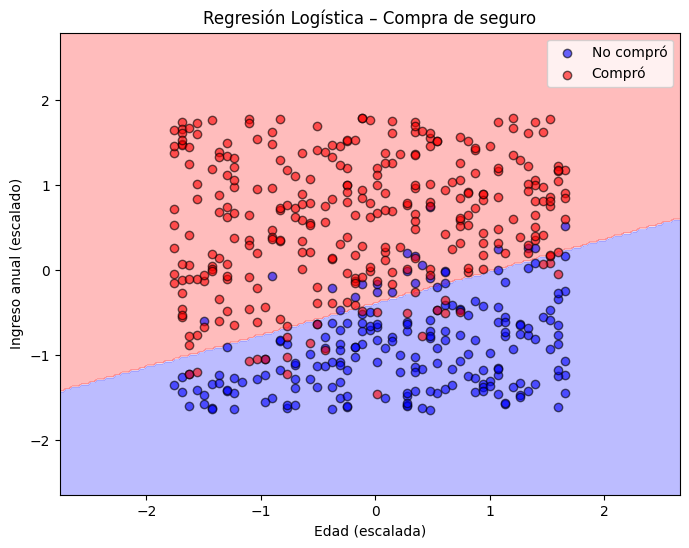

In [ ]:
plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')

plt.scatter(
    X_scaled[y == 0, 0], X_scaled[y == 0, 1],
    c='blue', edgecolor='k', label='No compró', alpha=0.6
)
plt.scatter(
    X_scaled[y == 1, 0], X_scaled[y == 1, 1],
    c='red', edgecolor='k', label='Compró', alpha=0.6
)

plt.xlabel('Edad (escalada)')
plt.ylabel('Ingreso anual (escalado)')
plt.title('Regresión Logística – Compra de seguro')
plt.legend()
plt.show()
